# The Travelling Salesman Problem

## Description

The Travelling Salesman Problem (TSP) is a classic algorithmic problem in the fields of computer science and operations research. It focuses on optimization. In this problem, a salesman is given a list of cities and must determine the shortest possible route that visits each city exactly once and returns to the origin city. The challenge is to find the most efficient route among the possible permutations of cities. TSP has applications in logistics, planning, and the manufacturing of microchips. It is an NP-hard problem, meaning that there is no known efficient way to solve it for large numbers of cities.

## Definition

### General Model

Given a set of cities and the distances between each pair of cities, the goal is to find the shortest possible tour that visits each city exactly once and returns to the starting city.

Mathematically, the problem can be formulated as follows:

- Let $C$ be a set of $n$ cities.
- Let $d(i, j)$ be the distance between city $i$ and city $j$.

The objective is to find a permutation $\pi$ of $C$ that minimizes the total tour length:

$$ \text{Minimize} \sum_{i=1}^{n-1} d(\pi(i), \pi(i+1)) + d(\pi(n), \pi(1)) $$

where $\pi(i)$ represents the $i$-th city in the permutation.

### Model based on Graph Representation

The Travelling Salesman Problem can also be represented using graph theory. In this representation:

- Each city is represented as a vertex.
- Each pair of cities is connected by an edge.
- The weight of an edge represents the distance between the two cities.

Formally, let $G = (V, E)$ be a complete graph where:
- $V$ is the set of vertices representing the cities.
- $E$ is the set of edges representing the paths between the cities.
- $w: E \rightarrow \mathbb{R}^+$ is a weight function that assigns a positive real number to each edge, representing the distance between the cities.

The objective is to find a Hamiltonian cycle (a cycle that visits each vertex exactly once and returns to the starting vertex) with the minimum total weight.

Mathematically, the problem can be formulated as:

$$ \text{Minimize} \sum_{(u,v) \in E} w(u,v) \cdot x_{uv} $$

subject to:

1. Each vertex is visited exactly once:
    $$ \sum_{v \in V} x_{uv} = 1 \quad \forall u \in V $$
    $$ \sum_{u \in V} x_{uv} = 1 \quad \forall v \in V $$

2. Subtour elimination constraints to ensure a single tour:
    $$ \sum_{(u,v) \in S} x_{uv} \leq |S| - 1 \quad \forall S \subset V, 2 \leq |S| \leq |V| - 1 $$

3. Nature of the variables:
    $$ x_{uv} \in \{0, 1\} \quad \forall (u,v) \in E $$

where $x_{uv}$ is a binary variable that is 1 if the edge $(u,v)$ is included in the tour and 0 otherwise.

## A Word on Subtour Elimination Constraints

Subtour elimination constraints are necessary to ensure that the solution to the Travelling Salesman Problem (TSP) forms a single tour that visits each city exactly once and returns to the starting city. Without these constraints, the solution might consist of multiple disconnected subtours, which do not satisfy the requirements of the TSP.

### Why Subtour Elimination Constraints are Needed

In the context of the TSP, a subtour is a smaller tour that visits a subset of cities but does not include all cities or return to the starting city. Subtour elimination constraints prevent these smaller tours from forming by ensuring that any subset of cities does not form a closed loop unless it includes all cities.

### Alternatives to Subtour Elimination Constraints

1. **Miller-Tucker-Zemlin (MTZ) Constraints**: These constraints introduce additional variables to keep track of the order in which cities are visited. They are simpler to implement but can be less efficient for larger instances of the TSP.

2. **Flow-based Formulations**: These formulations use flow variables to model the movement between cities, ensuring that the flow is consistent with a single tour. This approach can be more complex but may provide tighter formulations.

3. **Cutting Plane Methods**: These methods iteratively add subtour elimination constraints as needed during the solution process. This approach can be more efficient as it avoids adding all possible constraints upfront.

Each of these alternatives has its own advantages and trade-offs in terms of complexity, computational efficiency, and ease of implementation.


## An Illustrative Example

We will explore an example of the Travelling Salesman Problem (TSP) using a dataset stored in "assets/TSP.csv". This CSV file contains the following columns:

- `City`: The name of the city.
- `X`: The x-coordinate of the city.
- `Y`: The y-coordinate of the city.

These coordinates represent the positions of the cities on a 2D plane, and the goal is to find the shortest possible route that visits each city exactly once and returns to the origin city.

We will use a graph representation to model this problem

### Setting the Environment

In [18]:
%pip install pulp matplotlib numpy pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pulp as pl

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\vince\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Getting the Data

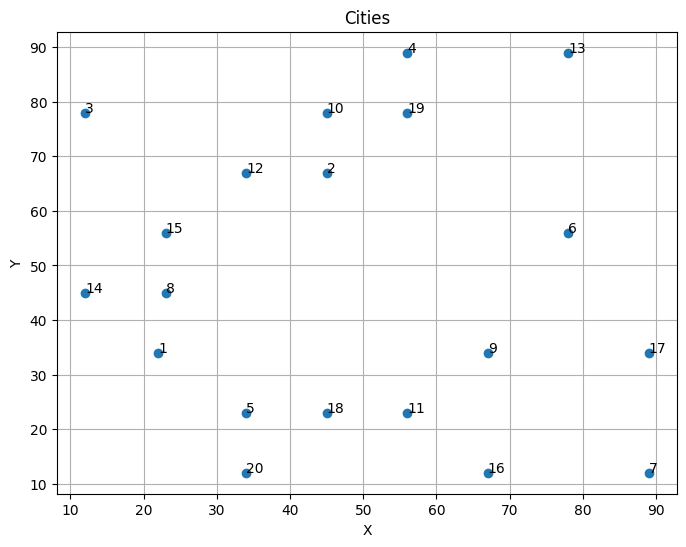

In [22]:

df = pd.read_csv('assets/TSP.csv')
df.columns = df.columns.str.strip()  # Strip any leading/trailing spaces from column names
df.set_index('City', inplace=True)

# Plot the cities
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'])
for city, x, y in df.itertuples():
    plt.text(x, y, city)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cities')
plt.grid()
plt.show()


### Creating the Adjacency Matrix

In [24]:
# Create the Adjacency Matrix
adjacency_matrix = df.apply(lambda x: df.apply(lambda y: np.ceil(((x['X'] - y['X'])**2 + (x['Y'] - y['Y'])**2)**0.5), axis=1), axis=1)
adjacency_matrix

City,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City,,,,,,,,,,,,,,,,,,,,
1,0.0,41.0,46.0,65.0,17.0,61.0,71.0,12.0,45.0,50.0,36.0,36.0,79.0,15.0,23.0,51.0,67.0,26.0,56.0,26.0
2,41.0,0.0,35.0,25.0,46.0,35.0,71.0,32.0,40.0,11.0,46.0,11.0,40.0,40.0,25.0,60.0,55.0,44.0,16.0,57.0
3,46.0,35.0,0.0,46.0,60.0,70.0,102.0,35.0,71.0,33.0,71.0,25.0,67.0,33.0,25.0,86.0,89.0,65.0,44.0,70.0
4,65.0,25.0,46.0,0.0,70.0,40.0,84.0,55.0,57.0,16.0,66.0,32.0,22.0,63.0,47.0,78.0,65.0,67.0,11.0,81.0
5,17.0,46.0,60.0,70.0,0.0,55.0,57.0,25.0,35.0,57.0,22.0,44.0,80.0,32.0,35.0,35.0,57.0,11.0,60.0,11.0
6,61.0,35.0,70.0,40.0,55.0,0.0,46.0,57.0,25.0,40.0,40.0,46.0,33.0,67.0,55.0,46.0,25.0,47.0,32.0,63.0
7,71.0,71.0,102.0,84.0,57.0,46.0,0.0,74.0,32.0,80.0,35.0,78.0,78.0,84.0,80.0,22.0,22.0,46.0,74.0,55.0
8,12.0,32.0,35.0,55.0,25.0,57.0,74.0,0.0,46.0,40.0,40.0,25.0,71.0,11.0,11.0,55.0,67.0,32.0,47.0,35.0
9,45.0,40.0,71.0,57.0,35.0,25.0,32.0,46.0,0.0,50.0,16.0,47.0,57.0,57.0,50.0,22.0,22.0,25.0,46.0,40.0


### Modeling the Problem with PULP

In [27]:
# Define the problem
tsp_problem = pl.LpProblem("TSP", pl.LpMinimize)

# Create decision variables
x = pl.LpVariable.dicts('x', [(i, j) for i in adjacency_matrix.index for j in adjacency_matrix.columns], cat='Binary')
u = pl.LpVariable.dicts('u', adjacency_matrix.index, lowBound=0, cat='Continuous')

# Objective function
tsp_problem += pl.lpSum(adjacency_matrix.loc[i, j] * x[i, j] for i in adjacency_matrix.index for j in adjacency_matrix.columns)

# Constraints
for k in adjacency_matrix.index:
    tsp_problem += pl.lpSum(x[k, j] for j in adjacency_matrix.columns if j != k) == 1
    tsp_problem += pl.lpSum(x[i, k] for i in adjacency_matrix.index if i != k) == 1

# Subtour elimination constraints
n = len(adjacency_matrix)
for i in adjacency_matrix.index:
    for j in adjacency_matrix.columns:
        if i != j and i != 1 and j != 1:
            tsp_problem += u[i] - u[j] + n * x[i, j] <= n - 1

# Print the problem
print(tsp_problem)

TSP:
MINIMIZE
50.0*x_(1,_10) + 36.0*x_(1,_11) + 36.0*x_(1,_12) + 79.0*x_(1,_13) + 15.0*x_(1,_14) + 23.0*x_(1,_15) + 51.0*x_(1,_16) + 67.0*x_(1,_17) + 26.0*x_(1,_18) + 56.0*x_(1,_19) + 41.0*x_(1,_2) + 26.0*x_(1,_20) + 46.0*x_(1,_3) + 65.0*x_(1,_4) + 17.0*x_(1,_5) + 61.0*x_(1,_6) + 71.0*x_(1,_7) + 12.0*x_(1,_8) + 45.0*x_(1,_9) + 50.0*x_(10,_1) + 57.0*x_(10,_11) + 16.0*x_(10,_12) + 35.0*x_(10,_13) + 47.0*x_(10,_14) + 32.0*x_(10,_15) + 70.0*x_(10,_16) + 63.0*x_(10,_17) + 55.0*x_(10,_18) + 11.0*x_(10,_19) + 11.0*x_(10,_2) + 67.0*x_(10,_20) + 33.0*x_(10,_3) + 16.0*x_(10,_4) + 57.0*x_(10,_5) + 40.0*x_(10,_6) + 80.0*x_(10,_7) + 40.0*x_(10,_8) + 50.0*x_(10,_9) + 36.0*x_(11,_1) + 57.0*x_(11,_10) + 50.0*x_(11,_12) + 70.0*x_(11,_13) + 50.0*x_(11,_14) + 47.0*x_(11,_15) + 16.0*x_(11,_16) + 35.0*x_(11,_17) + 11.0*x_(11,_18) + 55.0*x_(11,_19) + 46.0*x_(11,_2) + 25.0*x_(11,_20) + 71.0*x_(11,_3) + 66.0*x_(11,_4) + 22.0*x_(11,_5) + 40.0*x_(11,_6) + 35.0*x_(11,_7) + 40.0*x_(11,_8) + 16.0*x_(11,_9) + 36.0*

### Solving the Problem

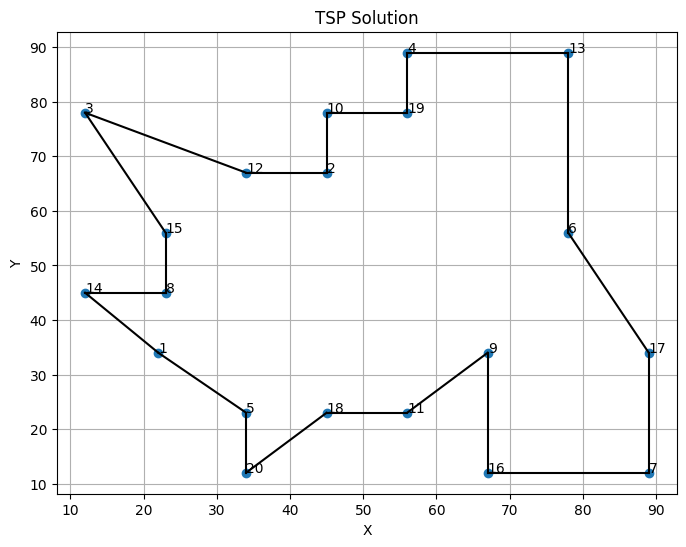

In [28]:
# Solve the problem
tsp_problem.solve()

# Extract the solution
solution = [(i, j) for i in adjacency_matrix.index for j in adjacency_matrix.columns if pl.value(x[i, j]) == 1]
solution

# Plot the solution
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'])
for city, x, y in df.itertuples():
    plt.text(x, y, city)
for i, j in solution:
    plt.plot([df.loc[i, 'X'], df.loc[j, 'X']], [df.loc[i, 'Y'], df.loc[j, 'Y']], 'k-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution')
plt.grid()

plt.show()

### Effect of SubTour Elimination Constraints

We will deactivate the subtour elimination constraints to observe the resulting solution. This will help us understand the importance of these constraints in ensuring a valid tour that visits each city exactly once and returns to the starting city.

You should observe that without the subtour elimination constraints, the solution may consist of multiple disconnected subtours rather than a single tour that visits each city exactly once and returns to the starting city. This demonstrates the importance of subtour elimination constraints in ensuring a valid solution to the Travelling Salesman Problem (TSP). The resulting plot should show these disconnected subtours, highlighting the necessity of these constraints for obtaining a feasible and optimal tour.

The validation process is crucial in ensuring that the solution obtained is feasible and meets the problem's requirements. In the context of the Travelling Salesman Problem (TSP), validation helps verify that the solution forms a single tour that visits each city exactly once and returns to the starting city. Without validation, the solution might consist of multiple disconnected subtours, which do not satisfy the TSP requirements. This highlights the importance of subtour elimination constraints and other validation techniques in obtaining a valid and optimal solution.

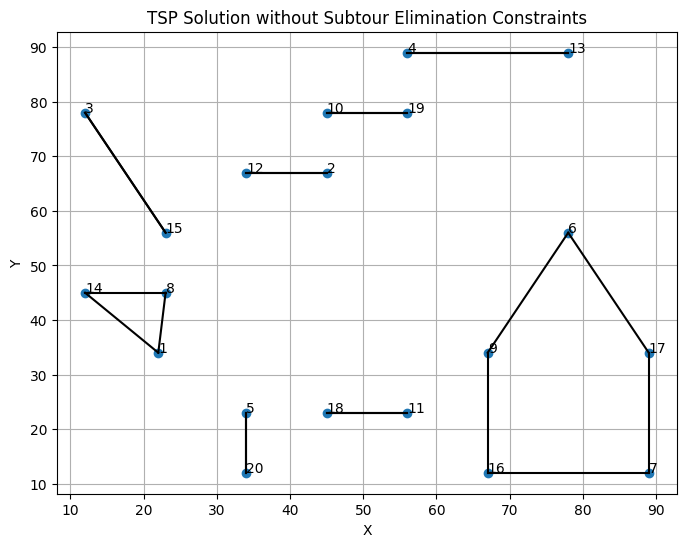

In [29]:
# Define the problem without subtour elimination constraints
tsp_problem_no_subtour = pl.LpProblem("TSP_No_Subtour", pl.LpMinimize)

# Create decision variables
x_no_subtour = pl.LpVariable.dicts('x', [(i, j) for i in adjacency_matrix.index for j in adjacency_matrix.columns], cat='Binary')

# Objective function
tsp_problem_no_subtour += pl.lpSum(adjacency_matrix.loc[i, j] * x_no_subtour[i, j] for i in adjacency_matrix.index for j in adjacency_matrix.columns)

# Constraints
for k in adjacency_matrix.index:
    tsp_problem_no_subtour += pl.lpSum(x_no_subtour[k, j] for j in adjacency_matrix.columns if j != k) == 1
    tsp_problem_no_subtour += pl.lpSum(x_no_subtour[i, k] for i in adjacency_matrix.index if i != k) == 1

# Solve the problem
tsp_problem_no_subtour.solve()

# Extract the solution
solution_no_subtour = [(i, j) for i in adjacency_matrix.index for j in adjacency_matrix.columns if pl.value(x_no_subtour[i, j]) == 1]

# Plot the solution
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'])
for city, x, y in df.itertuples():
    plt.text(x, y, city)
for i, j in solution_no_subtour:
    plt.plot([df.loc[i, 'X'], df.loc[j, 'X']], [df.loc[i, 'Y'], df.loc[j, 'Y']], 'k-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution without Subtour Elimination Constraints')
plt.grid()

plt.show()

## Conclusion

The Travelling Salesman Problem (TSP) is a complex optimization problem that requires finding the shortest possible route that visits each city exactly once and returns to the origin city. In this notebook, we explored the TSP using a dataset of cities and their coordinates. We modeled the problem using the PULP library and created an adjacency matrix to represent the distances between cities.

We first solved the TSP with subtour elimination constraints, ensuring a valid tour that visits each city exactly once. The resulting plot showed a single tour connecting all cities. We then deactivated the subtour elimination constraints to observe the effect on the solution. Without these constraints, the solution consisted of multiple disconnected subtours, highlighting the importance of subtour elimination constraints in obtaining a feasible and optimal tour.

Overall, this notebook demonstrated the significance of proper constraints in solving the TSP and provided insights into the modeling and solving process using linear programming techniques.